In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2025-02-19 00:56:10.265032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to 784-dimensional vectors
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,), kernel_initializer=initializer))
    model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer))
    return model

In [4]:
# Zero initialization
zero_init_model = create_model(initializer=tf.keras.initializers.Zeros())
zero_init_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
zero_init_history = zero_init_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)

# He initialization
he_init_model = create_model(initializer=tf.keras.initializers.HeNormal())
he_init_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
he_init_history = he_init_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=0)

/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


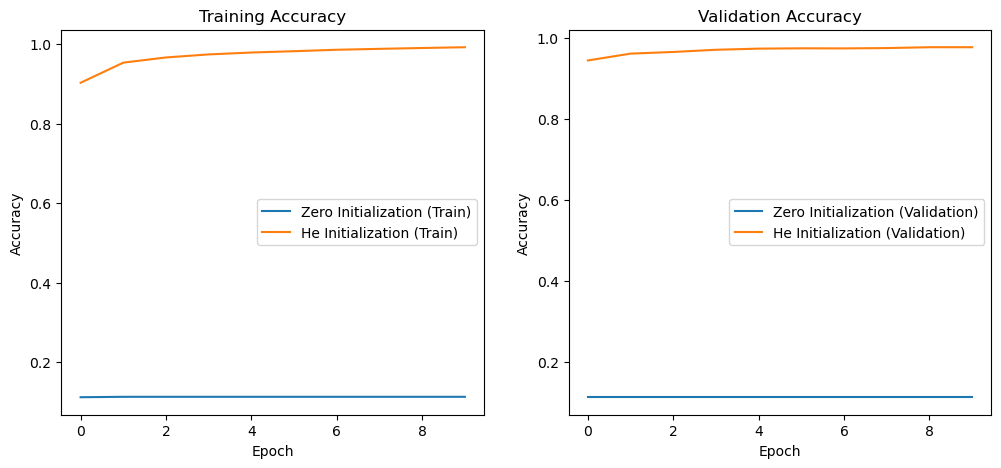

In [5]:
plt.figure(figsize=(12, 5))

# Plotting training accuracy
plt.subplot(1, 2, 1)
plt.plot(zero_init_history.history['accuracy'], label='Zero Initialization (Train)')
plt.plot(he_init_history.history['accuracy'], label='He Initialization (Train)')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation accuracy
plt.subplot(1, 2, 2)
plt.plot(zero_init_history.history['val_accuracy'], label='Zero Initialization (Validation)')
plt.plot(he_init_history.history['val_accuracy'], label='He Initialization (Validation)')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()